In [20]:
# Load Modules
import numpy as np 
import pandas as pd
from matplotlib import ticker
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot

In [21]:
#read file
data=pd.read_csv('archive/DUQ_hourly.csv')

In [22]:
data.shape

(119068, 2)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119068 entries, 0 to 119067
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  119068 non-null  object 
 1   DUQ_MW    119068 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.8+ MB


In [24]:
print(data.dtypes)

Datetime     object
DUQ_MW      float64
dtype: object


In [25]:
# function "datetime" transforma the columns "datetime" from object (string) to datetime.
data['Datetime'] = pd.to_datetime( data['Datetime'] )

In [26]:
data.dtypes

Datetime    datetime64[ns]
DUQ_MW             float64
dtype: object

In [27]:
# divide into numerical and categorical columns, as they will be treated with different techniques.
num_attributes = data.select_dtypes( include=['float64'] )
cat_attributes = data.select_dtypes( exclude=['float64', 'datetime64[ns]'] )

In [28]:
num_attributes.sample()

,DUQ_MW
111195,1422.0


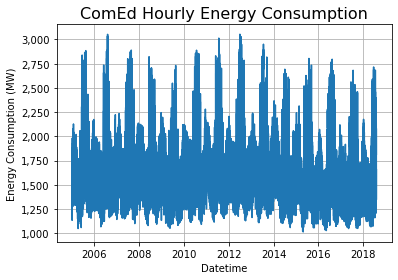

In [29]:
ax = sns.lineplot(data=data, x='Datetime', y='DUQ_MW')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('Datetime')
plt.ylabel('Energy Consumption (MW)')
plt.title('ComEd Hourly Energy Consumption', fontsize=16)
plt.grid(True)
plt.show()

In [30]:
data = data.set_index('Datetime')
data.index = pd.to_datetime(data.index)

### convert data to stationary

In [31]:
df=data.diff().dropna()
print(df.head(10))

                     DUQ_MW
Datetime                   
2005-12-31 02:00:00   -81.0
2005-12-31 03:00:00   -26.0
2005-12-31 04:00:00   -15.0
2005-12-31 05:00:00    20.0
2005-12-31 06:00:00    16.0
2005-12-31 07:00:00    30.0
2005-12-31 08:00:00    23.0
2005-12-31 09:00:00    77.0
2005-12-31 10:00:00    54.0
2005-12-31 11:00:00    47.0


#### ploting stationary data

In [32]:
df = df.reset_index()

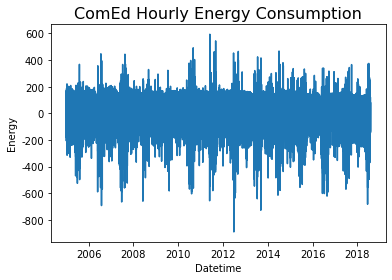

In [33]:
ax = sns.lineplot(data=df, x='Datetime', y='DUQ_MW')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('Datetime')
plt.ylabel('Energy')
plt.title('ComEd Hourly Energy Consumption', fontsize=16)
plt.show()

### Testing

In [34]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(df['DUQ_MW'])

1. ADF :  -46.67240727147047
2. P-Value :  0.0
3. Num Of Lags :  71
4. Num Of Observations Used For ADF Regression: 118995
5. Critical Values :
	 1% :  -3.430404955595364
	 5% :  -2.8615642895548903
	 10% :  -2.5667829284726755


In [35]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: setuptools!=50.0.0,>=38.6.0 in c:\users\hp\anaconda3\lib\site-packages (from pmdarima) (61.2.0)



In [53]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['DUQ_MW'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1268297.534, Time=211.96 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1353873.238, Time=3.78 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1289412.107, Time=4.72 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1312404.737, Time=37.31 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1353871.238, Time=2.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1288083.908, Time=39.16 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1288325.900, Time=62.91 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1268799.873, Time=332.12 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1263531.142, Time=401.67 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1287706.831, Time=119.91 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=464.10 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=1261738.234, Time=284.42 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=235.18 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=1261587.732, Time

### TRAIN TEST SPLIT

In [37]:
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)

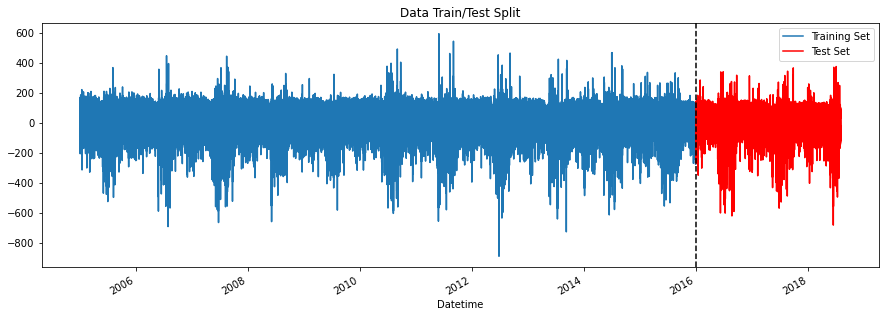

In [38]:
train = df.loc[df.index < '01-01-2016']
test = df.loc[df.index >= '01-01-2016']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set',color='r')
ax.axvline('01-01-2016', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [39]:
print(train.shape,test.shape)

(96387, 1) (22680, 1)


## MODELS

In [40]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

In [41]:
import warnings
warnings.filterwarnings("ignore")
model=sm.tsa.ARIMA(train['DUQ_MW'],order=(3,0,4))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 DUQ_MW   No. Observations:                96387
Model:                 ARIMA(3, 0, 4)   Log Likelihood             -512411.168
Date:                Sun, 18 Sep 2022   AIC                        1024840.337
Time:                        23:14:16   BIC                        1024925.622
Sample:                             0   HQIC                       1024866.262
                              - 96387                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0023      0.108      0.021      0.983      -0.209       0.213
ar.L1          2.2803      0.024     94.943      0.000       2.233       2.327
ar.L2         -1.6861      0.046    -36.856      0.000      -1.776      -1.596
ar.L3          0.3672      0.023     15.779      0.000       0.322       0.413
ma.L1         -1.9067      0.024    -79.571      0.000      -1.954      -1.860
ma.L2          0.9952      0.037     26.859      0.000       0.923       1.068
ma.L3         -0.1054      0.010    -10.542      0.000      -0.125      -0.086
ma.L4          0.0388      0.007      5.496      0.000       0.025       0.053
sigma2      2444.5145      4.964    492.473      0.000    2434.786    2454.243
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):            555429.62
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                            -0.08
Prob(H) (two-sided):                  0.43   Kurtosis:                        14.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end)

In [43]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['DUQ_MW'].mean()
rmse=sqrt(mean_squared_error(pred,test['DUQ_MW']))
print(rmse)

67.48176385315581


### SARIMAX

In [48]:
model2=sm.tsa.statespace.SARIMAX(train['DUQ_MW'],order=(3,1,4),trend='c')
result2=model2.fit()

In [49]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 DUQ_MW   No. Observations:                96387
Model:               SARIMAX(3, 1, 4)   Log Likelihood             -523052.785
Date:                Sun, 18 Sep 2022   AIC                        1046123.571
Time:                        23:28:56   BIC                        1046208.856
Sample:                             0   HQIC                       1046149.496
                              - 96387                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0008      0.002      0.484      0.628      -0.002       0.004
ar.L1         -0.6233      0.005   -130.452      0.000      -0.633      -0.614
ar.L2         -0.0738      0.005    -14.575      0.000      -0.084      -0.064
ar.L3          0.6515      0.004    144.866      0.000       0.643       0.660
ma.L1          0.2320      0.005     43.030      0.000       0.221       0.243
ma.L2         -0.3347      0.003   -112.943      0.000      -0.340      -0.329
ma.L3         -0.9383      0.003   -303.119      0.000      -0.944      -0.932
ma.L4          0.0421      0.005      8.833      0.000       0.033       0.051
sigma2      3278.3741      7.654    428.335      0.000    3263.373    3293.375
===================================================================================
Ljung-Box (L1) (Q):                  24.73   Jarque-Bera (JB):            384242.38
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                            -0.23
Prob(H) (two-sided):                  0.89   Kurtosis:                        12.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
start=len(train)
end=len(train)+len(test)-1
pred2=result2.predict(start = start, end = end, dynamic= True)


In [51]:
test['DUQ_MW'].mean()
rmse2=sqrt(mean_squared_error(pred2,test['DUQ_MW']))
print(rmse2)

68.515717572227
